In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score, precision_score, \
recall_score, cohen_kappa_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns = 999
pd.options.display.max_rows = 50

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [82]:
events = pd.read_csv('D:/Project Fin/events.csv')
info = pd.read_csv('D:/Project Fin/ginf.csv')

In [83]:
events.head()

id_odsp   id_event  sort_order  time  \
0  UFot0hit/  UFot0hit1           1     2   
1  UFot0hit/  UFot0hit2           2     4   
2  UFot0hit/  UFot0hit3           3     4   
3  UFot0hit/  UFot0hit4           4     7   
4  UFot0hit/  UFot0hit5           5     7   

                                                text  event_type  event_type2  \
0  Attempt missed. Mladen Petric (Hamburg) left f...           1         12.0   
1  Corner,  Borussia Dortmund. Conceded by Dennis...           2          NaN   
2  Corner,  Borussia Dortmund. Conceded by Heiko ...           2          NaN   
3           Foul by Sven Bender (Borussia Dortmund).           3          NaN   
4  Gokhan Tore (Hamburg) wins a free kick in the ...           8          NaN   

   side         event_team           opponent            player  \
0     2         Hamburg SV  Borussia Dortmund     mladen petric   
1     1  Borussia Dortmund         Hamburg SV  dennis diekmeier   
2     1  Borussia Dortmund         Hamburg SV  heiko westermann   
3     1  Borussia Dortmund         Hamburg SV       sven bender   
4     2         Hamburg SV  Borussia Dortmund       gokhan tore   

            player2 player_in player_out  shot_place  shot_outcome  is_goal  \
0       gokhan tore       NaN        NaN         6.0           2.0        0   
1  dennis diekmeier       NaN        NaN         NaN           NaN        0   
2  heiko westermann       NaN        NaN         NaN           NaN        0   
3               NaN       NaN        NaN         NaN           NaN        0   
4               NaN       NaN        NaN         NaN           NaN        0   

   location  bodypart  assist_method  situation  fast_break  
0       9.0       2.0              1        1.0           0  
1       NaN       NaN              0        NaN           0  
2       NaN       NaN              0        NaN           0  
3       NaN       NaN              0        NaN           0  
4       2.0       NaN              0        NaN           0

In [84]:
info.head()

id_odsp                                          link_odsp  adv_stats  \
0  UFot0hit/  /soccer/germany/bundesliga-2011-2012/dortmund-...       True   
1  Aw5DflLH/  /soccer/germany/bundesliga-2011-2012/augsburg-...       True   
2  bkjpaC6n/  /soccer/germany/bundesliga-2011-2012/werder-br...       True   
3  CzPV312a/  /soccer/france/ligue-1-2011-2012/paris-sg-lori...       True   
4  GUOdmtII/  /soccer/france/ligue-1-2011-2012/caen-valencie...       True   

         date league  season  country                   ht              at  \
0  2011-08-05     D1    2012  germany    Borussia Dortmund      Hamburg SV   
1  2011-08-06     D1    2012  germany          FC Augsburg     SC Freiburg   
2  2011-08-06     D1    2012  germany        Werder Bremen  Kaiserslautern   
3  2011-08-06     F1    2012   france  Paris Saint-Germain         Lorient   
4  2011-08-06     F1    2012   france                 Caen    Valenciennes   

   fthg  ftag  odd_h  odd_d  odd_a  odd_over  odd_under  odd_bts  odd_bts_n  
0     3     1   1.56   4.41   7.42       NaN        NaN      NaN        NaN  
1     2     2   2.36   3.60   3.40       NaN        NaN      NaN        NaN  
2     2     0   1.83   4.20   4.80       NaN        NaN      NaN        NaN  
3     0     1   1.55   4.50   9.40       NaN        NaN      NaN        NaN  
4     1     0   2.50   3.40   3.45       NaN        NaN      NaN        NaN


# We add to our events dataset useful information from the ginf.csv, such as the league/country and the date.

In [85]:
events = events.merge(info[['id_odsp', 'country', 'date']], on='id_odsp', how='left')
events.head()

id_odsp   id_event  sort_order  time  \
0  UFot0hit/  UFot0hit1           1     2   
1  UFot0hit/  UFot0hit2           2     4   
2  UFot0hit/  UFot0hit3           3     4   
3  UFot0hit/  UFot0hit4           4     7   
4  UFot0hit/  UFot0hit5           5     7   

                                                text  event_type  event_type2  \
0  Attempt missed. Mladen Petric (Hamburg) left f...           1         12.0   
1  Corner,  Borussia Dortmund. Conceded by Dennis...           2          NaN   
2  Corner,  Borussia Dortmund. Conceded by Heiko ...           2          NaN   
3           Foul by Sven Bender (Borussia Dortmund).           3          NaN   
4  Gokhan Tore (Hamburg) wins a free kick in the ...           8          NaN   

   side         event_team           opponent            player  \
0     2         Hamburg SV  Borussia Dortmund     mladen petric   
1     1  Borussia Dortmund         Hamburg SV  dennis diekmeier   
2     1  Borussia Dortmund         Hamburg SV  heiko westermann   
3     1  Borussia Dortmund         Hamburg SV       sven bender   
4     2         Hamburg SV  Borussia Dortmund       gokhan tore   

            player2 player_in player_out  shot_place  shot_outcome  is_goal  \
0       gokhan tore       NaN        NaN         6.0           2.0        0   
1  dennis diekmeier       NaN        NaN         NaN           NaN        0   
2  heiko westermann       NaN        NaN         NaN           NaN        0   
3               NaN       NaN        NaN         NaN           NaN        0   
4               NaN       NaN        NaN         NaN           NaN        0   

   location  bodypart  assist_method  situation  fast_break  country  \
0       9.0       2.0              1        1.0           0  germany   
1       NaN       NaN              0        NaN           0  germany   
2       NaN       NaN              0        NaN           0  germany   
3       NaN       NaN              0        NaN           0  germany   
4       2.0       NaN              0        NaN           0  germany   

         date  
0  2011-08-05  
1  2011-08-05  
2  2011-08-05  
3  2011-08-05  
4  2011-08-05

In [86]:
extract_year = lambda x: datetime.strptime(x, "%Y-%m-%d").year
events['year'] = [extract_year(x) for key, x in enumerate(events['date'])]

In [87]:
shots = events[events.event_type==1]#Shots will contain everything related to this action of the game and exclude the rest
shots['player'] = shots['player'].str.title()
shots['player2'] = shots['player2'].str.title()
shots['country'] = shots['country'].str.title()

C:\Users\Pratik\AppData\Local\Temp\ipykernel_15696\91337083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player'] = shots['player'].str.title()
C:\Users\Pratik\AppData\Local\Temp\ipykernel_15696\91337083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player2'] = shots['player2'].str.title()
C:\Users\Pratik\AppData\Local\Temp\ipykernel_15696\91337083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [88]:
shots.head()

id_odsp    id_event  sort_order  time  \
0   UFot0hit/   UFot0hit1           1     2   
11  UFot0hit/  UFot0hit12          12    14   
13  UFot0hit/  UFot0hit14          14    17   
14  UFot0hit/  UFot0hit15          15    19   
17  UFot0hit/  UFot0hit18          18    20   

                                                 text  event_type  \
0   Attempt missed. Mladen Petric (Hamburg) left f...           1   
11  Attempt missed. Shinji Kagawa (Borussia Dortmu...           1   
13  Goal!  Borussia Dortmund 1, Hamburg 0. Kevin G...           1   
14  Attempt blocked. Mats Hummels (Borussia Dortmu...           1   
17  Attempt blocked. Tomas Rincon (Hamburg) right ...           1   

    event_type2  side         event_team           opponent  \
0          12.0     2         Hamburg SV  Borussia Dortmund   
11         12.0     1  Borussia Dortmund         Hamburg SV   
13         12.0     1  Borussia Dortmund         Hamburg SV   
14          NaN     1  Borussia Dortmund         Hamburg SV   
17          NaN     2         Hamburg SV  Borussia Dortmund   

               player      player2 player_in player_out  shot_place  \
0       Mladen Petric  Gokhan Tore       NaN        NaN         6.0   
11      Shinji Kagawa  Mario Gotze       NaN        NaN        13.0   
13  Kevin Grosskreutz  Mario Gotze       NaN        NaN         4.0   
14       Mats Hummels          NaN       NaN        NaN         2.0   
17       Tomas Rincon          NaN       NaN        NaN         2.0   

    shot_outcome  is_goal  location  bodypart  assist_method  situation  \
0            2.0        0       9.0       2.0              1        1.0   
11           2.0        0      15.0       1.0              1        1.0   
13           1.0        1       9.0       2.0              1        1.0   
14           3.0        0      15.0       1.0              0        1.0   
17           3.0        0      15.0       1.0              0        1.0   

    fast_break  country        date  year  
0            0  Germany  2011-08-05  2011  
11           0  Germany  2011-08-05  2011  
13           0  Germany  2011-08-05  2011  
14           0  Germany  2011-08-05  2011  
17           0  Germany  2011-08-05  2011

# -Data Exploration

In [89]:
pie = shots[['shot_outcome', 'id_event']].groupby('shot_outcome').count().reset_index().rename(columns={'id_event': 'count'})

In [90]:
pie.shot_outcome = pie.shot_outcome.astype(int)
pie.shot_outcome = pie.shot_outcome.replace({1: 'On Target', 2: 'Off Target', 3: 'Blocked', 4: 'Hit the Bar'})

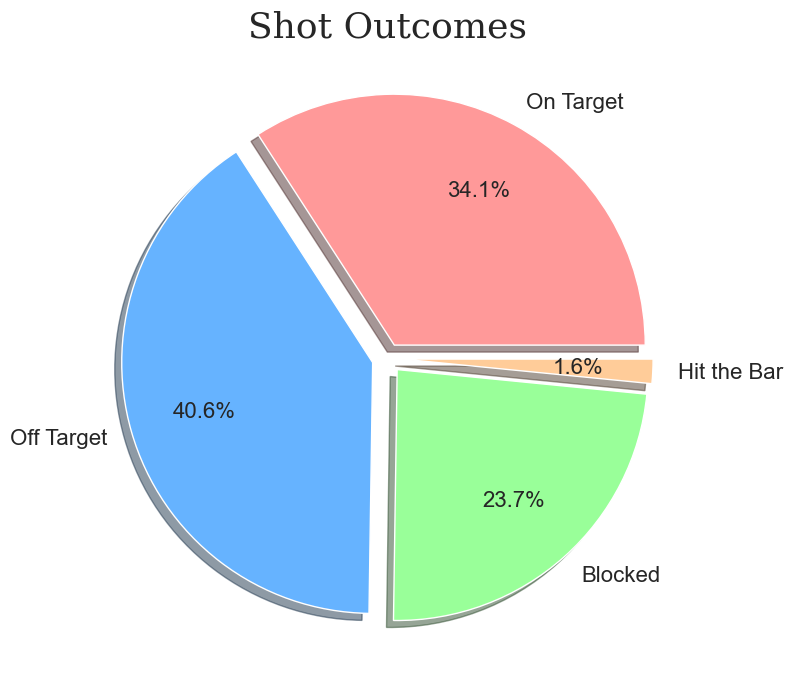

In [91]:
fig, ax = plt.subplots(figsize=[8,8])
labels = pie['shot_outcome']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(x=pie['count'], autopct="%.1f%%", labels=labels, explode=[0.06]*4, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.title("Shot Outcomes", fontsize=26, fontfamily='serif')
plt.tight_layout()
plt.show()

In [92]:
bar = shots[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'count'})
bar.shot_place = bar.shot_place.astype(int)
bar.shot_place = bar.shot_place.replace({1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', \
                                        9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'})

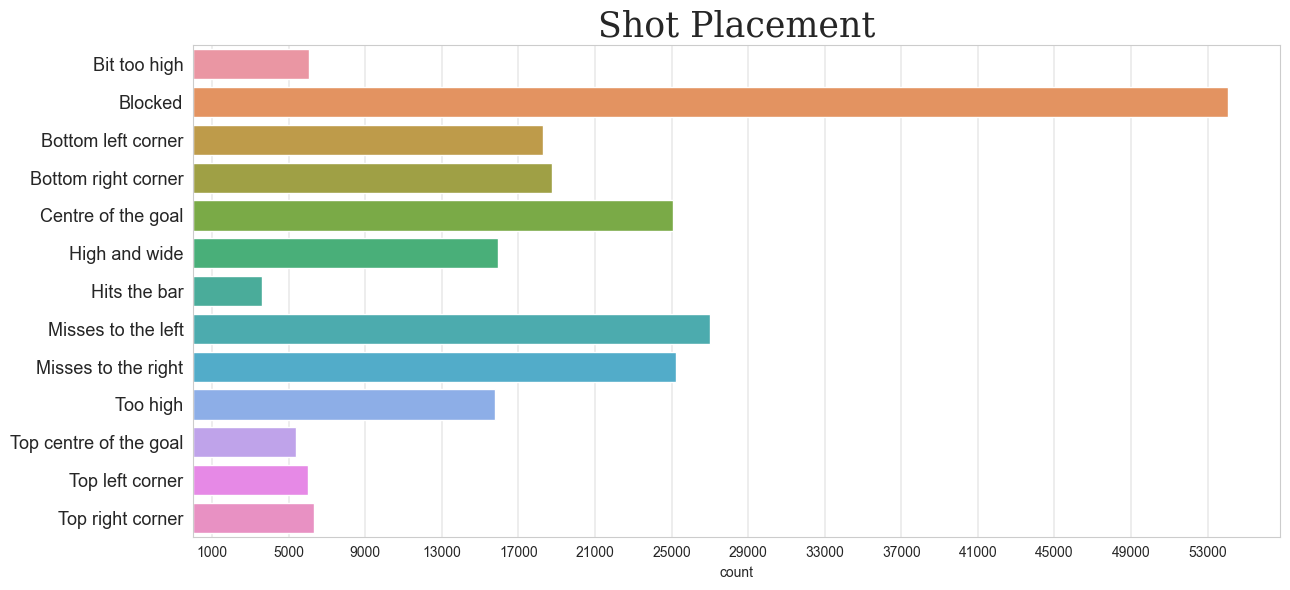

In [93]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[13,6])
labels = bar['shot_place']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(x=bar['count'], y=labels)
ax.set_yticklabels(labels, size = 13)
ax.set_xticks(np.arange(1000,57000,4000))
ax.set_ylabel(ylabel='')
plt.title("Shot Placement", fontsize=25, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [94]:
goals  = shots[['is_goal', 'id_event', 'country']].groupby(['is_goal', 'country']).count().reset_index().rename(columns={'id_event': 'count'})
goals.is_goal = goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})

In [95]:
goals['percentage']=0
for i in range(len(goals)):
    for country in goals.country.unique():
        if goals.iloc[i,goals.columns.get_loc("country")]==country:
            goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \
                                                            goals[goals.country==country]['count'].sum()
goals['percentage']=round(goals['percentage']*100,2)

In [96]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}%'.format(p.get_height())
            ax.text(_x, _y+2, value, ha="center", fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

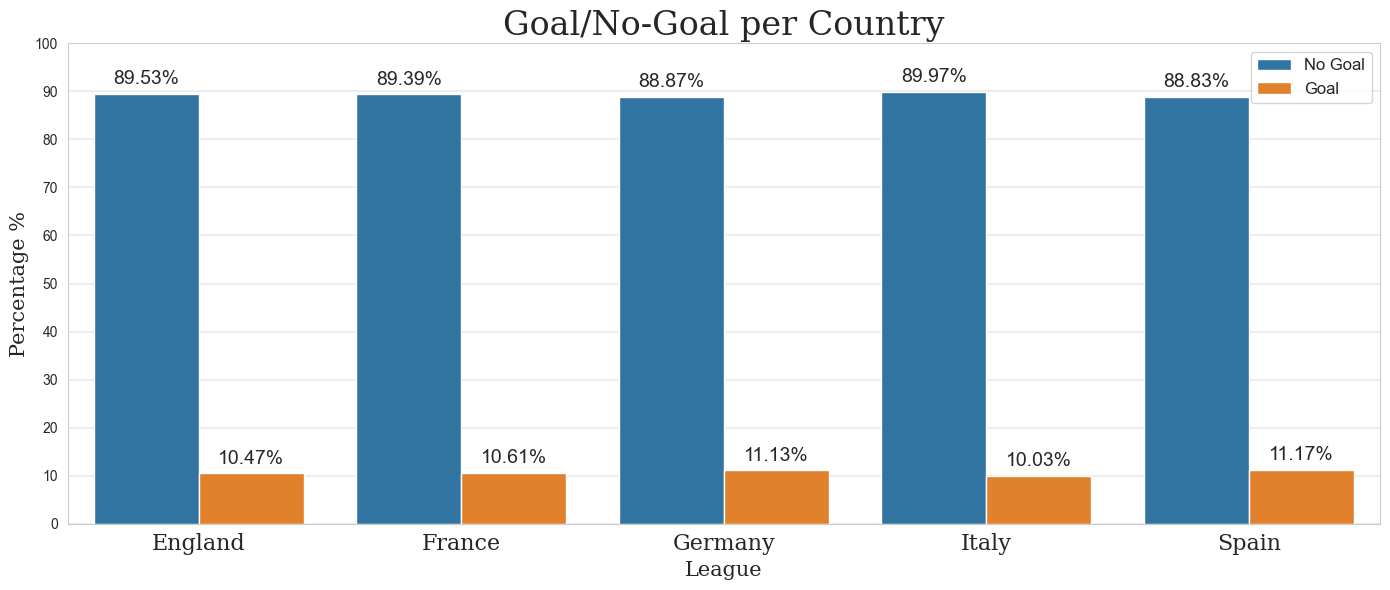

In [97]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[14,6])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(data=goals, y='percentage', hue='is_goal', x='country')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='League', fontsize=15, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal/No-Goal per Country", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=12)
show_values_on_bars(ax)
plt.show()

In [98]:
# There are barely any differences across the different main leagues. It seems that any given shot has a 10-11% chance of being a goal anywhere in the world.
goals  = shots[['is_goal', 'id_event', 'year']].groupby(['is_goal', 'year']).count().reset_index().rename(columns={'id_event': 'count'})
goals.is_goal = goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})

In [99]:
goals['percentage']=0
for i in range(len(goals)):
    for year in goals.year.unique():
        if goals.iloc[i,goals.columns.get_loc("year")]==year:
            goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \
                                                            goals[goals.year==year]['count'].sum()
goals['percentage']=round(goals['percentage']*100,2)

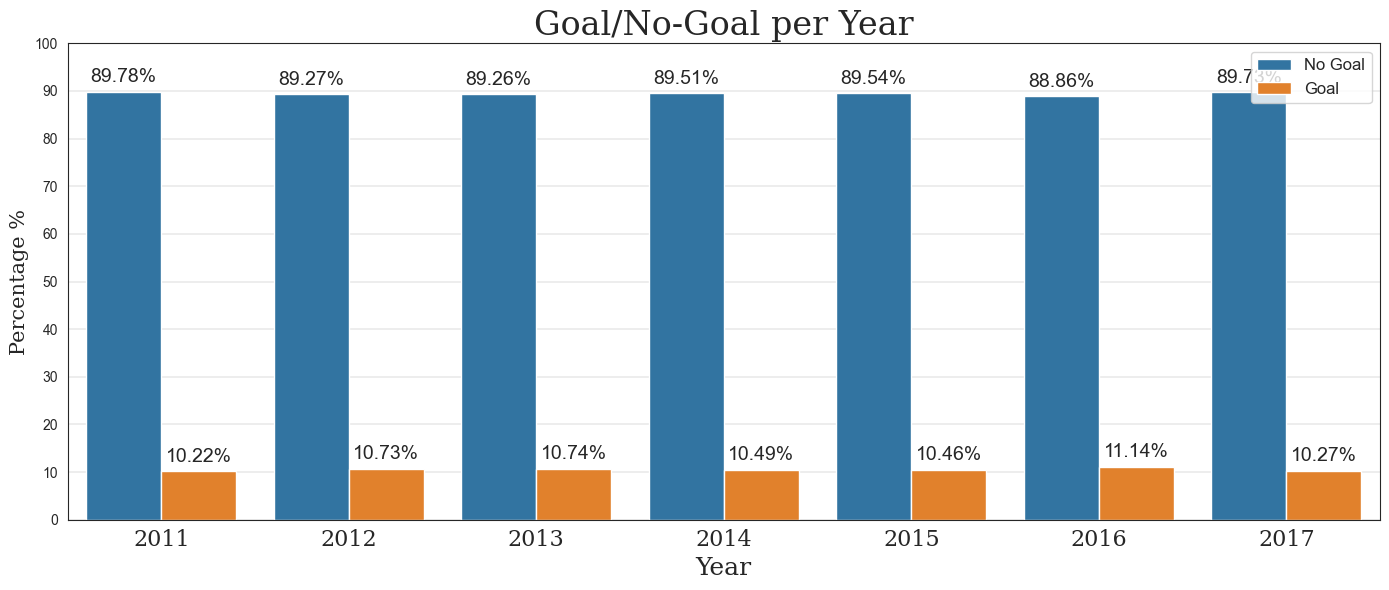

In [100]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=[14,6])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(data=goals, y='percentage', hue='is_goal', x='year')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='Year', fontsize=18, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal/No-Goal per Year", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=12)
show_values_on_bars(ax)
plt.show()

## Again we find that the goal/no-goal ratios are nearly the same across time.

## So it's becoming quite clear that statistically speaking 1 out of 9 to 10 shots are goals, no matter where or when you look at.

# xG Model

In [101]:
data = pd.get_dummies(shots.iloc[:,-8:-3], columns=['location', 'bodypart','assist_method', 'situation'])
data.columns = ['fast_break', 'loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right',
                'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range',
                'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'not_recorded', 'right_foot', 
                'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header',
                'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick']
data['is_goal'] = shots['is_goal']

In [102]:
print(len(data))
print(data.is_goal.sum())
print(len(data.columns)-1)

229135
24441
28


In [103]:
data.head()

fast_break  loc_centre_box  loc_diff_angle_lr  diff_angle_left  \
0            0               0                  0                0   
11           0               0                  0                0   
13           0               0                  0                0   
14           0               0                  0                0   
17           0               0                  0                0   

    diff_angle_right  left_side_box  left_side_6ybox  right_side_box  \
0                  0              1                0               0   
11                 0              0                0               0   
13                 0              1                0               0   
14                 0              0                0               0   
17                 0              0                0               0   

    right_side_6ybox  close_range  penalty  outside_box  long_range  more_35y  \
0                  0            0        0            0           0         0   
11                 0            0        0            1           0         0   
13                 0            0        0            0           0         0   
14                 0            0        0            1           0         0   
17                 0            0        0            1           0         0   

    more_40y  not_recorded  right_foot  left_foot  header  no_assist  \
0          0             0           0          1       0          0   
11         0             0           1          0       0          0   
13         0             0           0          1       0          0   
14         0             0           1          0       0          1   
17         0             0           1          0       0          1   

    assist_pass  assist_cross  assist_header  assist_through_ball  open_play  \
0             1             0              0                    0          1   
11            1             0              0                    0          1   
13            1             0              0                    0          1   
14            0             0              0                    0          1   
17            0             0              0                    0          1   

    set_piece  corner  free_kick  is_goal  
0           0       0          0        0  
11          0       0          0        0  
13          0       0          0        1  
14          0       0          0        0  
17          0       0          0        0

In [104]:
#lets split the data in 65-35 for training and testing of model
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)


# Gradient Boosting Classifier

In [160]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def evaluate_model(params): 
    model = GradientBoostingClassifier(
                        learning_rate=params['learning_rate'],
                        min_samples_leaf=params['min_samples_leaf'],
                        max_depth = params['max_depth'],
                        max_features = params['max_features']
                        )

    model.fit(X_train, y_train)
    return {
        'learning_rate': params['learning_rate'],
        'min_samples_leaf': params['min_samples_leaf'],
        'max_depth': params['max_depth'],
        'max_features': params['max_features'],
        'train_ROCAUC': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
        'test_ROCAUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        'recall': recall_score(y_test, model.predict(X_test)),
        'precision': precision_score(y_test, model.predict(X_test)),
        'f1_score': f1_score(y_test, model.predict(X_test)),
        'train_accuracy': model.score(X_train, y_train),
        'test_accuracy': model.score(X_test, y_test),
    }

def objective(params):
    res = evaluate_model(params)
    
    res['loss'] = - res['test_ROCAUC'] # Esta loss es la que hyperopt intenta minimizar
    res['status'] = STATUS_OK # Asi le decimos a hyperopt que el experimento salio bien
    return res 

hyperparameter_space = {
        'learning_rate': hp.uniform('learning_rate', 0.05, 0.3),
        'min_samples_leaf': hp.choice('min_samples_leaf', range(15, 200)),
        'max_depth': hp.choice('max_depth', range(2, 20)),
        'max_features': hp.choice('max_features', range(3, 27))
}

In [161]:
trials = Trials()
fmin(
    objective,
    space=hyperparameter_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
);

100%|██████████| 50/50 [14:25<00:00, 17.31s/trial, best loss: -0.8194061214247517]


In [162]:
pd.DataFrame(trials.results).sort_values(by='f1_score', ascending=False).head(5)

learning_rate  min_samples_leaf  max_depth  max_features  train_ROCAUC  \
4        0.174411                21         17             9      0.819323   
44       0.135018                32         17            19      0.819186   
5        0.272567                50         18            17      0.819243   
8        0.212759                50          6            16      0.818419   
1        0.243024                15         16            24      0.819507   

    test_ROCAUC    recall  precision  f1_score  train_accuracy  test_accuracy  \
4      0.818064  0.269167   0.710428  0.390414        0.910633       0.910871   
44     0.818258  0.269050   0.711222  0.390410        0.910600       0.910908   
5      0.818156  0.268932   0.711132  0.390273        0.910620       0.910896   
8      0.818817  0.268344   0.714688  0.390186        0.910445       0.911058   
1      0.817889  0.269050   0.709677  0.390177        0.910660       0.910821   

        loss status  
4  -0.818064     ok  
44 -0.818258     ok  
5  -0.818156     ok  
8  -0.818817     ok  
1  -0.817889     ok


## As there are no large differences when trying different values for the parameter, that means there is no sign of overfitting

In [163]:
model = GradientBoostingClassifier(
                        learning_rate=0.285508,
                        min_samples_leaf=99,
                        max_depth = 19,
                        max_features = 7
                        )
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.285508, max_depth=19, max_features=7,
                           min_samples_leaf=99)

In [164]:
print('The test set contains {} examples (shots) of which {} are positive (goals).'.format(len(y_test), y_test.sum()))
print('The accuracy of classifying whether a shot is goal or not is {}%.'.format(round(model.score(X_test, y_test)*100),2))
print('Our classifier obtains an ROC-AUC of {}%'.format(round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])*100),2))

The test set contains 80198 examples (shots) of which 8504 are positive (goals).
The accuracy of classifying whether a shot is goal or not is 91%.
Our classifier obtains an ROC-AUC of 82%


In [165]:
print('The baseline performance for PR-AUC is {}%. This is the PR-AUC that what we would get by random guessing.'.format(round(y_train.mean(),2)))
print('Our model obtains an PR-AUC of {}%.'.format(round(average_precision_score(y_test, model.predict_proba(X_test)[:, 1])*100,2)))
print('Our classifier obtains a Cohen Kappa of {}.'.format(round(cohen_kappa_score(y_test,model.predict(X_test)),2)))

The baseline performance for PR-AUC is 0.11%. This is the PR-AUC that what we would get by random guessing.
Our model obtains an PR-AUC of 47.33%.
Our classifier obtains a Cohen Kappa of 0.35.


In [166]:
print(color.BOLD + color.YELLOW + 'Confusion Matrix:\n' + color.END)
print(confusion_matrix(y_test,model.predict(X_test)))
print(color.BOLD +  color.YELLOW + '\n Report:' + color.END)
print(classification_report(y_test,model.predict(X_test)))

Confusion Matrix:

[[70785   909]
 [ 6231  2273]]

 Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.71      0.27      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



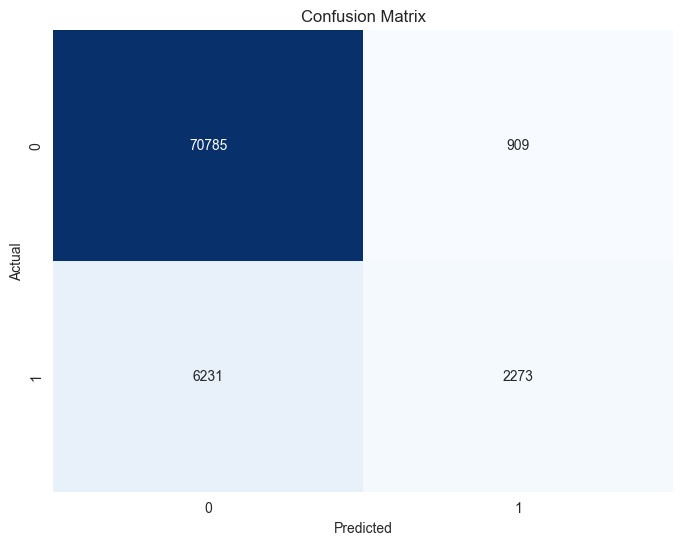


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.71      0.27      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



In [167]:
cm = confusion_matrix(y_test, model.predict(X_test))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(color.BOLD + color.YELLOW + '\nClassification Report:\n' + color.END)
print(classification_report(y_test, model.predict(X_test)))

# Logistic Regression

In [168]:
model = LogisticRegression(max_iter=400)
model.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [169]:
print('The test set contains {} examples (shots) of which {} are positive (goals).'.format(len(y_test), y_test.sum()))
print('The accuracy of classifying whether a shot is goal or not is {}%.'.format(round(model.score(X_test, y_test)*100),2))
print('Our classifier obtains an ROC-AUC of {}%'.format(round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])*100),2))

The test set contains 80198 examples (shots) of which 8504 are positive (goals).
The accuracy of classifying whether a shot is goal or not is 91%.
Our classifier obtains an ROC-AUC of 82%


In [170]:
print('The baseline performance for PR-AUC is {}%. This is the PR-AUC that what we would get by random guessing.'.format(round(y_train.mean(),2)))
print('Our model obtains an PR-AUC of {}%.'.format(round(average_precision_score(y_test, model.predict_proba(X_test)[:, 1])*100,2)))
print('Our classifier obtains a Cohen Kappa of {}.'.format(round(cohen_kappa_score(y_test,model.predict(X_test)),2)))

The baseline performance for PR-AUC is 0.11%. This is the PR-AUC that what we would get by random guessing.
Our model obtains an PR-AUC of 47.08%.
Our classifier obtains a Cohen Kappa of 0.35.


In [171]:
print(color.BOLD + color.YELLOW + color.UNDERLINE + 'Confusion Matrix:\n' + color.END)
print(confusion_matrix(y_test,model.predict(X_test)))
print(color.BOLD +  color.YELLOW + color.UNDERLINE + '\n Report:' + color.END)
print(classification_report(y_test,model.predict(X_test)))

Confusion Matrix:

[[70820   874]
 [ 6265  2239]]

 Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.72      0.26      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



In [172]:
from sklearn.metrics import confusion_matrix, classification_report

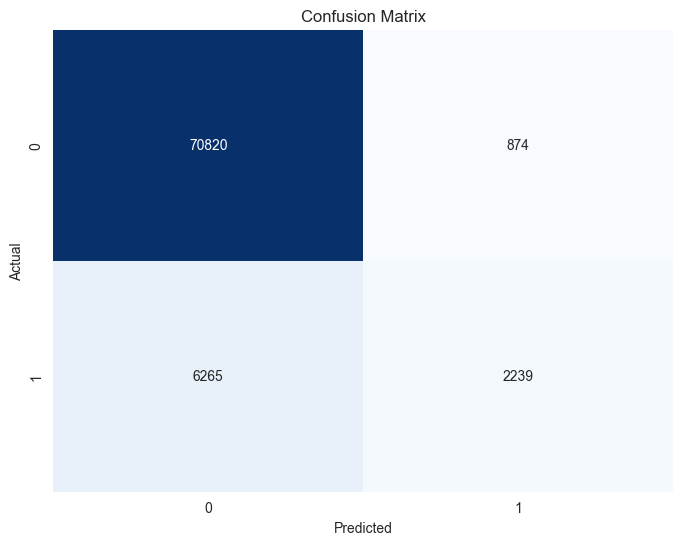


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     71694
           1       0.72      0.26      0.39      8504

    accuracy                           0.91     80198
   macro avg       0.82      0.63      0.67     80198
weighted avg       0.90      0.91      0.89     80198



In [173]:
# Get the confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(color.BOLD + color.YELLOW + '\nClassification Report:\n' + color.END)
print(classification_report(y_test, model.predict(X_test)))

## Almost exactly the same results as with Gradient Boosting. When this is the case, should usually prefer the simpler model, in this case the Logistic Regression. However, there are 39 goals that were correctly recognized as such by the Gradient Boosting that were not captured by the Logistic Regression. Even though this is not a huge difference, I will choose the Gradient Boosting because of it.

In [174]:
model = GradientBoostingClassifier(
                        learning_rate=0.285508,
                        min_samples_leaf=99,
                        max_depth = 19,
                        max_features = 7
                        )
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.285508, max_depth=19, max_features=7,
                           min_samples_leaf=99)

# Feature Importances
## Let's take a look at which of our features are more relevant for our model to make the decisions as to whether each shot is a goal or not.

In [175]:
import eli5
eli5.explain_weights(model, feature_names=list(X_train.columns))

Explanation(estimator='GradientBoostingClassifier(learning_rate=0.285508, max_depth=19, max_features=7,\n                           min_samples_leaf=99)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='close_range', weight=0.22761892883710075, std=0.0609939896858919, value=None), FeatureWeight(feature='penalty', weight=0.17474431748642782, std=0.036174430257144195, value=None), FeatureWeight(feature='not_recorded', weight=0.1745871451548658, std=0.04211961658779076, value=None), FeatureWeight(feature='outside_box', weight=0.09174493449220211, std=0.06396940727472968, value=None), FeatureWeight(feature='loc_centre_box', weight=0.07273849528031288, std=0.04982097119281464, value=None), FeatureWeight(feature='fast_break', weight=0.0620033734453313, std=0.069870008694912, value=None), FeatureWeight(feature='assist_through_ball', weight=0.03216652772520636, std=0.02670781017035042, value=None), FeatureWeight(feature='header', weight=0.029319694466175238, std=0.060394213945699694, value=None), FeatureWeight(feature='set_piece', weight=0.019560768864041143, std=0.03537263623585261, value=None), FeatureWeight(feature='assist_cross', weight=0.01551462491713644, std=0.07206566880422616, value=None), FeatureWeight(feature='left_side_6ybox', weight=0.01347357330177764, std=0.02274212505816218, value=None), FeatureWeight(feature='no_assist', weight=0.012063905592939912, std=0.08098351404573931, value=None), FeatureWeight(feature='right_side_6ybox', weight=0.010646828158377298, std=0.020753264360297646, value=None), FeatureWeight(feature='right_foot', weight=0.010118704050932242, std=0.05314682133621136, value=None), FeatureWeight(feature='open_play', weight=0.009796481783467679, std=0.040841823349139016, value=None), FeatureWeight(feature='free_kick', weight=0.007243135529646803, std=0.007236316180802924, value=None), FeatureWeight(feature='left_side_box', weight=0.007169088978080095, std=0.03328037300315922, value=None), FeatureWeight(feature='assist_pass', weight=0.006820024541150009, std=0.07923910161571027, value=None), FeatureWeight(feature='right_side_box', weight=0.006394990460170628, std=0.03758158291240144, value=None), FeatureWeight(feature='corner', weight=0.003909351416486821, std=0.03700727590148426, value=None)], remaining=8), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## Most of the shot-location clues (close range, centre of the box, outside of the box) stand among the most relevant, as expected

# Player Analysis

In [176]:
shots['prediction'] = model.predict_proba(X)[:, 1]
shots['difference'] = shots['prediction'] - shots['is_goal']

C:\Users\Pratik\AppData\Local\Temp\ipykernel_15696\3778964094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['prediction'] = model.predict_proba(X)[:, 1]
C:\Users\Pratik\AppData\Local\Temp\ipykernel_15696\3778964094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['difference'] = shots['prediction'] - shots['is_goal']


# Which players are the best finishers?

In [177]:
players = shots.groupby('player').sum().reset_index()
players.rename(columns={'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
players.expectedGoals = round(players.expectedGoals,2)
players.difference = round(players.difference,2)
players['ratio'] = players['trueGoals'] / players['expectedGoals']

In [178]:
print(round(players.expectedGoals.corr(players.trueGoals),3))

0.977


## Best Finishers

In [179]:
show = players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'difference', 'trueGoals', 'expectedGoals']].head(10)
show.head(5)

rank              player  difference  trueGoals  expectedGoals
0     1        Lionel Messi      -58.80        205         146.20
1     2  Zlatan Ibrahimovic      -33.67        153         119.33
2     3   Cristiano Ronaldo      -32.37        198         165.63
3     4         Luis Suarez      -31.74         96          64.26
4     5     Gonzalo Higuain      -31.72        118          86.28

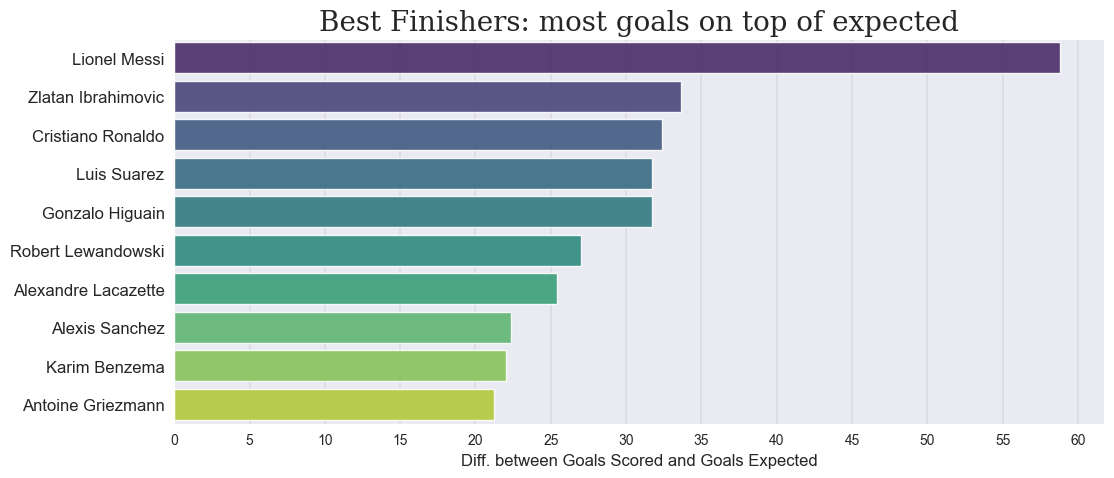

In [180]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=abs(show['difference']), y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,65,5))
ax.set_xlabel(xlabel='Diff. between Goals Scored and Goals Expected', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Best Finishers: most goals on top of expected", fontsize=20, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, alpha=0.8, axis='x')
plt.show()

# Best Finishers: goals/xGoals

## for finishers we'll only consider players who have scored more than 30 goals in overall 8 years.

In [181]:
show = players[players['trueGoals']>30].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'ratio', 'trueGoals', 'expectedGoals']].head(10)
show.head(5)

rank         player     ratio  trueGoals  expectedGoals
0     1  Franck Ribery  1.898434         40          21.07
1     2    Mario Gotze  1.586621         37          23.32
2     3       Bas Dost  1.549720         36          23.23
3     4   Heungmin Son  1.520913         32          21.04
4     5    Luis Suarez  1.493931         96          64.26

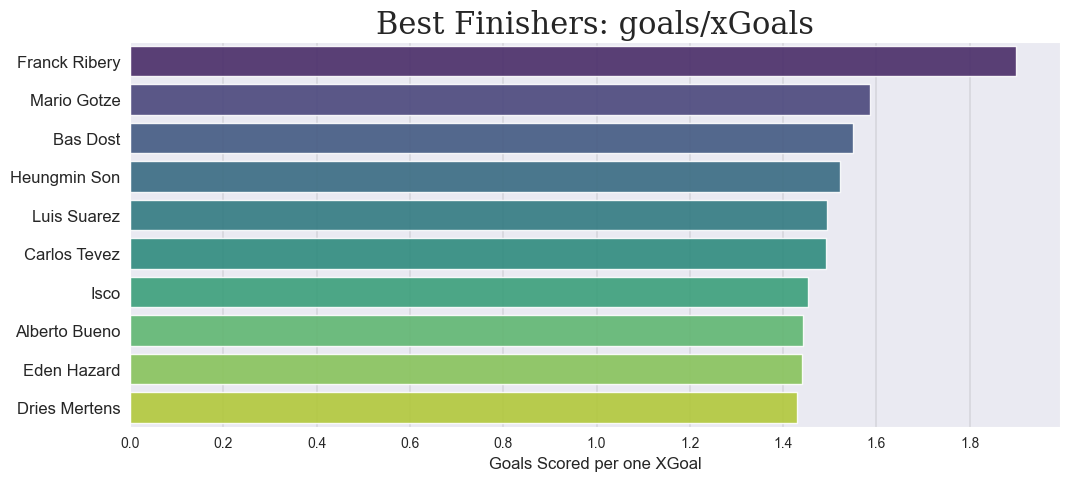

In [182]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=show['ratio'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,1.9,0.2))
ax.set_xlabel(xlabel='Goals Scored per one XGoal', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Best Finishers: goals/xGoals", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

## Best Finishers per Year per League

In [183]:
players_per_year = shots.groupby(['year', 'country', 'player']).sum().reset_index()
players_per_year.rename(columns={'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
players_per_year.expectedGoals = round(players_per_year.expectedGoals,2)
players_per_year.difference = round(players_per_year.difference,2)
players_per_year['ratio'] = players_per_year['trueGoals'] / players_per_year['expectedGoals']
players_per_year['ratio'] = round(players_per_year.ratio, 2)

In [184]:
def best_finishers_per_year(years, leagues, min_goals, df):
    years_res=[]; leagues_res=[]; players_res=[]; ratio_res=[]; goals=[]
    players_per_year = df[df['trueGoals']>min_goals]
    for league in leagues:
        for year in years:
            results = players_per_year[(players_per_year['year']==year) & (players_per_year['country']==league)].sort_values(by='ratio', ascending=False).reset_index(drop=True)
            results['rank'] = results.index + 1
            if len(results)>0:
                years_res.append(year)
                leagues_res.append(league)
                players_res.append(results[results['rank']==1]['player'].iloc[0])
                ratio_res.append(results[results['rank']==1]['ratio'].iloc[0])
                goals.append(results[results['rank']==1]['trueGoals'].iloc[0])
    return years_res, leagues_res, players_res, ratio_res, goals

In [185]:
years, leagues, players_res, ratio, goals = best_finishers_per_year(years = players_per_year.year.unique(), leagues=players_per_year.country.unique(),\
                       min_goals=12, df=players_per_year)

In [186]:
results_perYear = pd.DataFrame()
results_perYear['League']=leagues
results_perYear['Year']=years
results_perYear['bestFinisher']=players_res
results_perYear['Goals']=goals
results_perYear['Goals/xGoals Ratio']=ratio
results_perYear

League  Year              bestFinisher  Goals  Goals/xGoals Ratio
0    France  2011            Olivier Giroud     13                1.23
1    France  2012        Zlatan Ibrahimovic     18                1.47
2    France  2013           Dario Cvitanich     16                1.69
3    France  2014            Cheick Diabate     13                1.61
4    France  2015        Benjamin Moukandjo     13                1.68
5    France  2016        Zlatan Ibrahimovic     21                2.26
6   Germany  2011        Klaasjan Huntelaar     15                1.82
7   Germany  2012             Martin Harnik     15                1.79
8   Germany  2013                Ivica Olic     13                2.22
9   Germany  2014               Josip Drmic     14                2.03
10  Germany  2015                   Raffael     15                1.80
11  Germany  2016  Pierreemerick Aubameyang     23                1.34
12    Italy  2012            Miroslav Klose     14                2.06
13    Italy  2013               Luis Muriel     13                1.62
14    Italy  2014             Ciro Immobile     14                1.76
15    Italy  2015         Massimo Maccarone     15                1.80
16    Italy  2016             Dries Mertens     15                1.79
17    Spain  2011              Lionel Messi     17                1.54
18    Spain  2012              Lionel Messi     59                1.58
19    Spain  2013                     Pedro     16                2.01
20    Spain  2014         Cristiano Ronaldo     34                1.59
21    Spain  2015         Antoine Griezmann     25                1.77
22    Spain  2016               Gareth Bale     16                1.80
23  England  2013               Luis Suarez     16                1.63
24  England  2014         Christian Eriksen     13                1.85
25  England  2015              Odion Ighalo     14                1.73
26  England  2016               Eden Hazard     13                1.77


## Worst finishers

In [187]:
show = players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'difference', 'trueGoals', 'expectedGoals']].tail(10)
show.tail(3)

rank        player  difference  trueGoals  expectedGoals
4784  4785  Mats Hummels        8.93         10          18.93
4785  4786        Amauri       12.00         20          32.00
4786  4787   Jesus Navas       14.46          9          23.46

In [188]:
show = players[players['trueGoals']>30].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show = show.sort_values(by='rank', ascending=False)
show = show[['rank', 'player', 'ratio', 'trueGoals', 'expectedGoals']].head(10)
show.head(3)

rank             player     ratio  trueGoals  expectedGoals
140   141  Giampaolo Pazzini  0.780660         31          39.71
139   140    Mario Balotelli  0.812458         36          44.31
138   139  Gonzalo Bergessio  0.846301         31          36.63

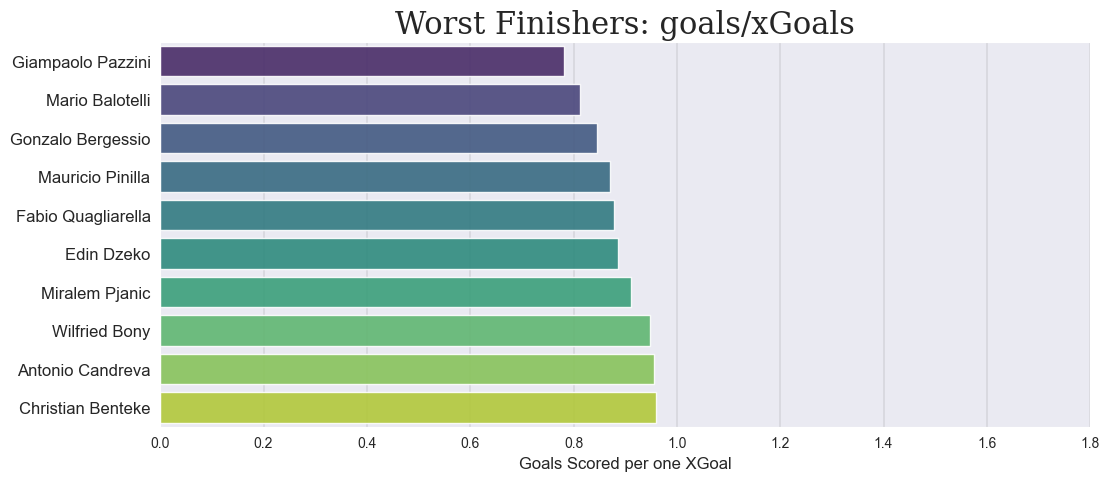

In [189]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=show['ratio'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,1.9,0.2))
ax.set_xlabel(xlabel='Goals Scored per one XGoal', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Worst Finishers: goals/xGoals", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

## Which players have the most "expected goals"?

In [190]:
show = players[['player', 'trueGoals', 'expectedGoals']].sort_values(['expectedGoals'], ascending=False).head(10)
show.head(5)

player  trueGoals  expectedGoals
944    Cristiano Ronaldo        198         165.63
2745        Lionel Messi        205         146.20
4779  Zlatan Ibrahimovic        153         119.33
1277      Edinson Cavani        121         113.98
3971  Robert Lewandowski        124          97.02

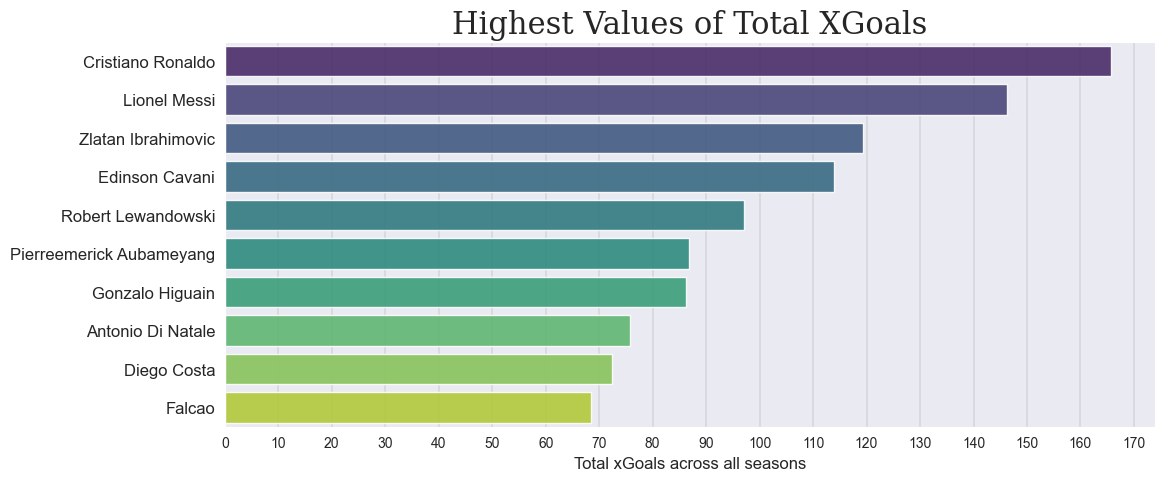

In [191]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=show['expectedGoals'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,180,10))
ax.set_xlabel(xlabel='Total xGoals across all seasons', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Highest Values of Total XGoals", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

## Which players are the worst at deciding their shots?

In [192]:
# Because event_type is always one in our data, we can use it its sum as the total number of shots each player took.
players.rename(columns={'event_type': 'n_shots'}, inplace=True)

In [193]:
players.head()

player  sort_order   time  n_shots  event_type2  side  shot_place  \
0            Aaron        2466   2335       48        432.0    70       284.0   
1  Aaron Cresswell        2215   2384       52        408.0    75       317.0   
2     Aaron Hughes          56     55        1         15.0     2         0.0   
3       Aaron Hunt       12387  10517      215       1563.0   278      1075.0   
4     Aaron Lennon        2521   2747       57        480.0    85       278.0   

   shot_outcome  trueGoals  location  bodypart  assist_method  situation  \
0          92.0          1     560.0      62.0             43       53.0   
1         107.0          4     629.0     103.0             38       66.0   
2           0.0          1      19.0       1.0              0        1.0   
3         428.0         25    2524.0     409.0            181      274.0   
4         112.0          8     557.0      69.0             55       66.0   

   fast_break    year  expectedGoals  difference     ratio  
0           0   96689           3.50        2.50  0.285714  
1           2  104795           3.44       -0.56  1.162791  
2           0    2013           0.98       -0.02  1.020408  
3           7  432783          26.37        1.37  0.948047  
4           1  114843           5.29       -2.71  1.512287

In [194]:
players['xG_per_shot_ratio'] = players['expectedGoals'] / players['n_shots']
show = players[players['n_shots']>100].sort_values(['xG_per_shot_ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show[['rank', 'player', 'xG_per_shot_ratio', 'trueGoals', 'expectedGoals', 'difference']].tail(5)

rank            player  xG_per_shot_ratio  trueGoals  expectedGoals  \
669   670      Daniel Baier           0.042147          5           7.46   
670   671  Ivan Radovanovic           0.041056          2           6.61   
671   672   Florent Balmont           0.036845          5           6.19   
672   673      Gokhan Inler           0.035622          9           6.59   
673   674   Tom Huddlestone           0.030463          2           3.29   

     difference  
669        2.46  
670        4.61  
671        1.19  
672       -2.41  
673        1.29

In [195]:
show = show[['rank', 'player', 'xG_per_shot_ratio', 'trueGoals', 'expectedGoals', 'difference']].head(10)
show.head(5)

rank           player  xG_per_shot_ratio  trueGoals  expectedGoals  \
0     1     Diego Milito           0.208986         33          28.84   
1     2    Kevin Gameiro           0.193465         63          58.62   
2     3   Ikechukwu Uche           0.192655         21          21.77   
3     4     Carlos Bacca           0.191087         57          43.95   
4     5  Dario Cvitanich           0.190690         30          22.12   

   difference  
0       -4.16  
1       -4.38  
2        0.77  
3      -13.05  
4       -7.88

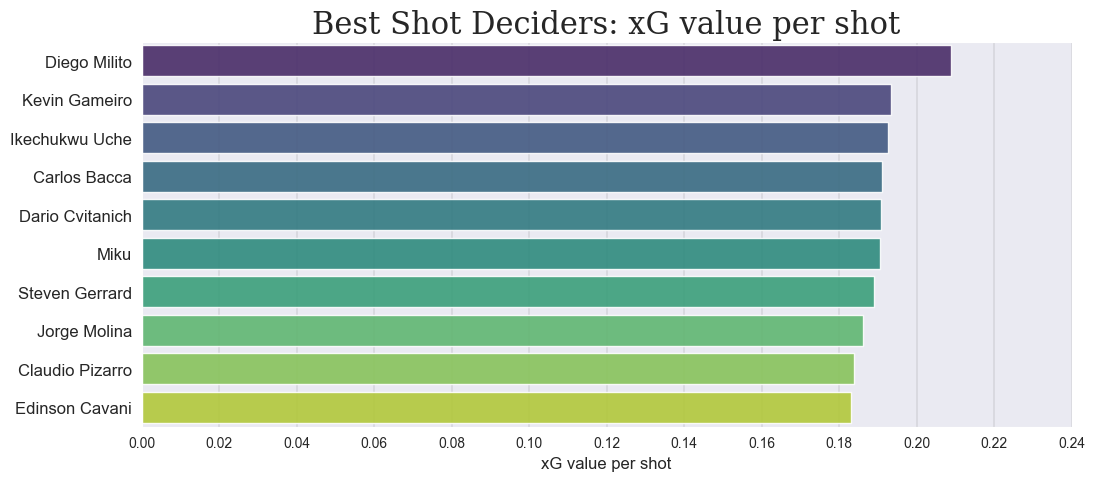

In [196]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=show['xG_per_shot_ratio'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,0.25,0.02))
ax.set_xlabel(xlabel='xG value per shot', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Best Shot Deciders: xG value per shot", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

## Which players are the best headers?

In [197]:
headers = shots[(shots.event_type==1) & (shots.bodypart==3)]
headers_players = headers.groupby('player').sum().reset_index()
headers_players.rename(columns={'event_type': 'n_headers', 'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
headers_players['ratio'] = headers_players['trueGoals'] / headers_players['expectedGoals']
show_headers = headers_players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show_headers['rank'] = show_headers.index+1
show_headers[['rank', 'player', 'n_headers', 'trueGoals', 'expectedGoals', 'difference']].head(5)

rank                    player  n_headers  trueGoals  expectedGoals  \
0     1         Cristiano Ronaldo        159         36      19.962626   
1     2           Mario Mandzukic        124         28      14.763458   
2     3         Fernando Llorente        141         25      15.931862   
3     4              Sloan Privat         86         17       9.914715   
4     5  Pierreemerick Aubameyang         59         14       7.311308   

   difference  
0  -16.037374  
1  -13.236542  
2   -9.068138  
3   -7.085285  
4   -6.688692

## Which players are the best at shooting with their left foot?

In [198]:
left_foot = shots[(shots.event_type==1) & (shots.bodypart==2)]
left_foot_players = left_foot.groupby('player').sum().reset_index()
left_foot_players.rename(columns={'event_type': 'n_leftFoot_shots', 'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
show_lfoot = left_foot_players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show_lfoot['rank'] = show_lfoot.index+1
show_lfoot[['rank', 'player', 'n_leftFoot_shots', 'trueGoals', 'expectedGoals', 'difference']].head(5)

rank             player  n_leftFoot_shots  trueGoals  expectedGoals  \
0     1       Lionel Messi               752        167     121.695281   
1     2  Antoine Griezmann               345         58      41.408426   
2     3       Arjen Robben               296         42      32.131236   
3     4        Iago Falque               132         23      13.277254   
4     5      Franck Ribery                57         16       6.434174   

   difference  
0  -45.304719  
1  -16.591574  
2   -9.868764  
3   -9.722746  
4   -9.565826

In [199]:
show_lfoot[show_lfoot.player=='Cristiano Ronaldo'][['rank', 'player', 'expectedGoals', 'trueGoals']]

rank             player  expectedGoals  trueGoals
78    79  Cristiano Ronaldo      28.361627         32

In [200]:
left_foot_players['ratio'] = left_foot_players['trueGoals'] / left_foot_players['expectedGoals']
show_lfoot = left_foot_players[left_foot_players['trueGoals']>20].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show_lfoot['rank'] = show_lfoot.index+1
show_lfoot[['rank', 'player', 'n_leftFoot_shots', 'trueGoals', 'expectedGoals', 'ratio']].head(5)

rank              player  n_leftFoot_shots  trueGoals  expectedGoals  \
0     1         Iago Falque               132         23      13.277254   
1     2       Mohamed Salah               129         23      13.908117   
2     3      Lukas Podolski               132         21      13.208121   
3     4     James Rodriguez               162         23      15.542154   
4     5  Zlatan Ibrahimovic               129         25      17.241224   

      ratio  
0  1.732286  
1  1.653711  
2  1.589931  
3  1.479846  
4  1.450013

## Which players are the best at shooting with their right foot?

In [201]:
right_foot = shots[(shots.event_type==1) & (shots.bodypart==1)]
right_foot_players = right_foot.groupby('player').sum().reset_index()
right_foot_players.rename(columns={'event_type': 'n_rightFoot_shots', 'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
show = right_foot_players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show[['rank', 'player', 'n_rightFoot_shots', 'trueGoals', 'expectedGoals', 'difference']].head(5)

rank               player  n_rightFoot_shots  trueGoals  expectedGoals  \
0     1          Luis Suarez                289         69      43.161009   
1     2      Gonzalo Higuain                362         86      60.768235   
2     3  Alexandre Lacazette                270         70      48.063769   
3     4   Zlatan Ibrahimovic                554        111      91.001744   
4     5   Robert Lewandowski                378         84      65.443928   

   difference  
0  -25.838991  
1  -25.231765  
2  -21.936231  
3  -19.998256  
4  -18.556072

In [202]:
right_foot_players['ratio'] = right_foot_players['trueGoals'] / right_foot_players['expectedGoals']
show_rfoot = right_foot_players[right_foot_players['trueGoals']>20].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show_rfoot['rank'] = show_rfoot.index+1
show_rfoot[['rank', 'player', 'n_rightFoot_shots', 'trueGoals', 'expectedGoals', 'ratio']].head(5)

rank         player  n_rightFoot_shots  trueGoals  expectedGoals     ratio
0     1       Bas Dost                 62         23      13.040435  1.763745
1     2   Carlos Tevez                181         33      19.838496  1.663433
2     3  Franck Ribery                165         24      14.432271  1.662940
3     4    Mario Gotze                170         32      19.867423  1.610677
4     5   Lionel Messi                109         30      18.722379  1.602360

In [203]:
right_foot = right_foot_players[right_foot_players['n_rightFoot_shots']>5]
left_foot = left_foot_players[left_foot_players['n_leftFoot_shots']>5]
headers = headers_players[headers_players['n_headers']>5]
all_players = right_foot[['player']].merge(left_foot, on='player', how='inner').merge(headers, on='player', how='inner')                                                                         
all_players_list = list(all_players['player'].unique())

def compare_players(players_list):
    total = right_foot[right_foot['player'].isin(players_list)][['player', 'ratio']]
    total['bodypart']='Right Foot'
    left_foot['bodypart']='Left Foot'
    headers['bodypart']= 'Header'
    total = pd.concat([total, left_foot[left_foot['player'].isin(players_list)][['player', 'ratio', 'bodypart']], headers[headers['player'].isin(players_list)][['player', 'ratio', 'bodypart']]], axis=0)

    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=[15,8])
    ax = sns.barplot(y=total['ratio'], x=total['player'], hue=total['bodypart'], palette='viridis', alpha=0.9)
    #ax.set_yticks(np.arange(0,2.2,0.2))
    ax.set_ylabel(ylabel='Goals per xG Ratio', fontsize=14)
    ax.set_xlabel(xlabel='')
    ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=15)
    plt.title("Players Comparison", fontsize=24, fontfamily='serif')
    ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
    plt.legend(fontsize=12)
    plt.show()

C:\Users\Pratik\AppData\Local\Temp\ipykernel_15696\2208215359.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_foot['bodypart']='Left Foot'
C:\Users\Pratik\AppData\Local\Temp\ipykernel_15696\2208215359.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headers['bodypart']= 'Header'


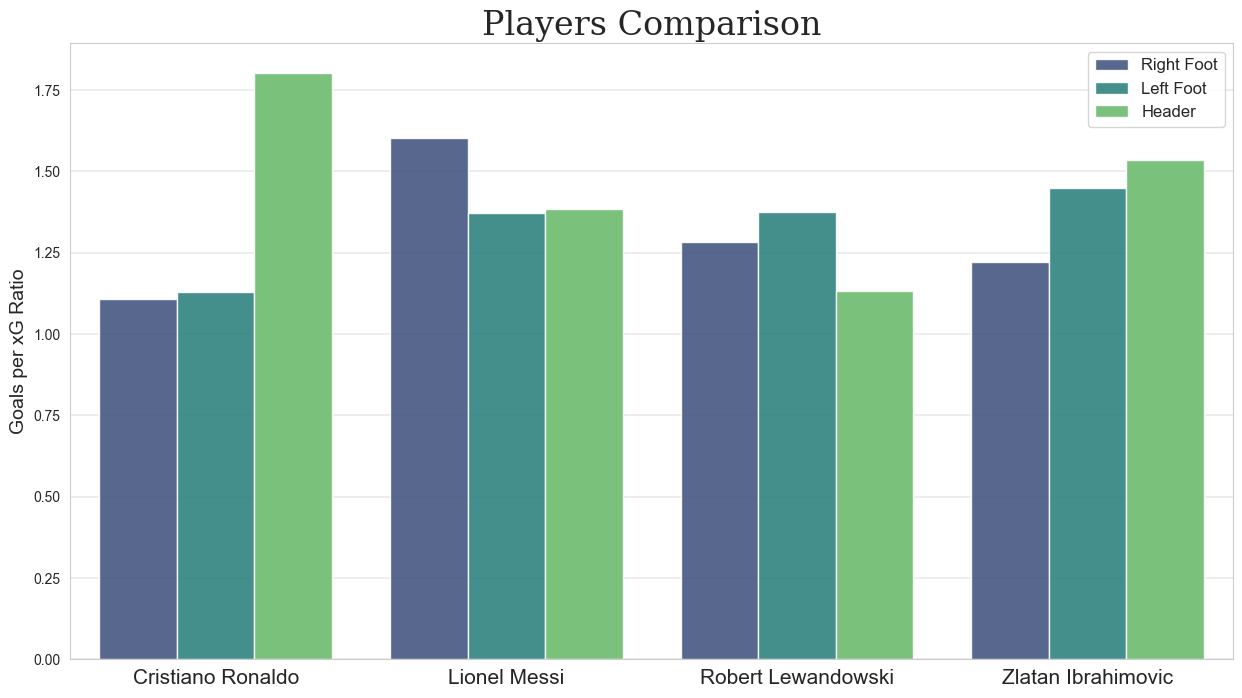

In [204]:
compare_players(players_list = ['Lionel Messi', 'Cristiano Ronaldo', 'Zlatan Ibrahimovic', 'Robert Lewandowski'])

C:\Users\Pratik\AppData\Local\Temp\ipykernel_15696\2208215359.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_foot['bodypart']='Left Foot'
C:\Users\Pratik\AppData\Local\Temp\ipykernel_15696\2208215359.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headers['bodypart']= 'Header'


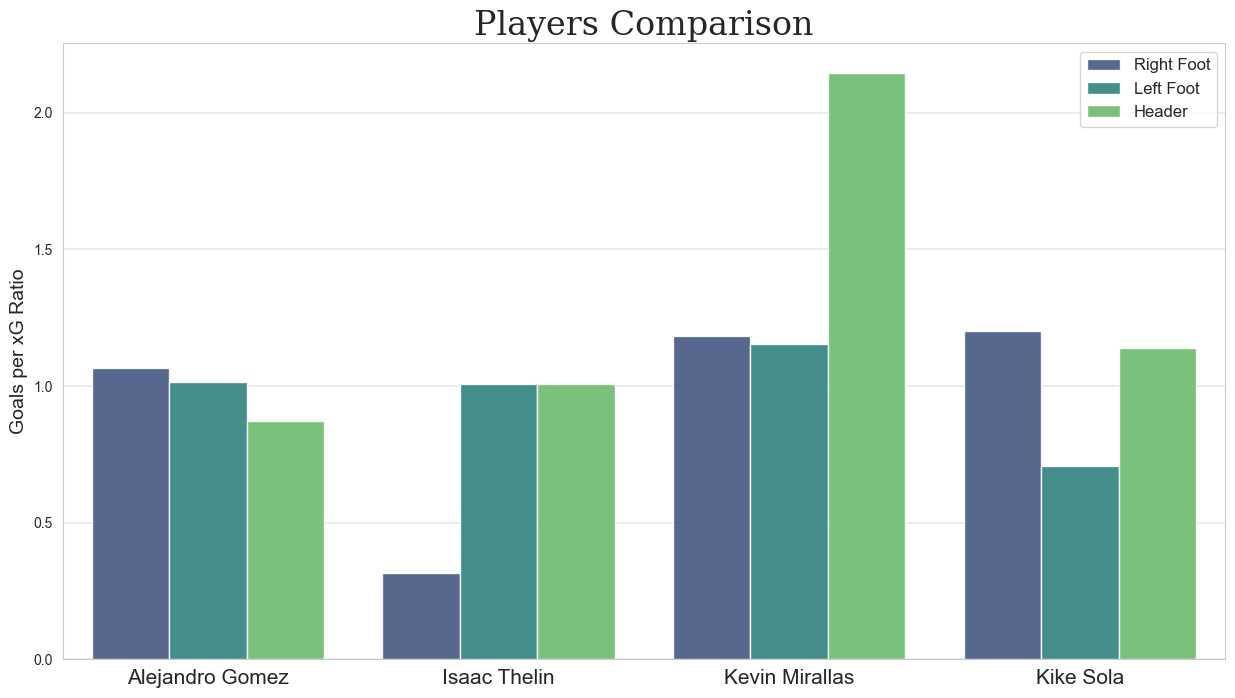

In [205]:
import random
compare_players(random.sample(all_players_list, 4))

## Which are the best outside-the-box shooters?

In [206]:
outside_box = shots[(shots.location==15)]
outbox_players = outside_box.groupby('player').sum().reset_index()
outbox_players.rename(columns={'event_type': 'n_outbox_shots', 'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
show = outbox_players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show[['rank', 'player', 'n_outbox_shots', 'trueGoals', 'expectedGoals', 'difference']].head(5)

rank              player  n_outbox_shots  trueGoals  expectedGoals  \
0     1        Lionel Messi             304         16       6.384680   
1     2          Paul Pogba             226         14       5.984446   
2     3  Zlatan Ibrahimovic             261         14       6.792181   
3     4     Gonzalo Higuain             127         11       3.858842   
4     5          Yaya Toure             128         10       3.379392   

   difference  
0   -9.615320  
1   -8.015554  
2   -7.207819  
3   -7.141158  
4   -6.620608

In [207]:
show[['rank', 'player', 'n_outbox_shots', 'trueGoals', 'expectedGoals', 'difference']].tail(5)

rank               player  n_outbox_shots  trueGoals  expectedGoals  \
4143  4144     Alberto Aquilani             117          0       3.145052   
4144  4145        Ronny Rodelin             119          0       3.204265   
4145  4146       Francesco Lodi             170          0       3.446672   
4146  4147  Alessandro Diamanti             254          3       6.515548   
4147  4148      Mario Balotelli             209          1       4.738036   

      difference  
4143    3.145052  
4144    3.204265  
4145    3.446672  
4146    3.515548  
4147    3.738036

In [208]:
outbox_players['ratio'] = outbox_players['trueGoals'] / outbox_players['expectedGoals']
show = outbox_players[outbox_players['n_outbox_shots']>80].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'n_outbox_shots', 'trueGoals', 'expectedGoals', 'ratio']].head(10)
show.head(5)

rank               player  n_outbox_shots  trueGoals  expectedGoals  \
0     1      James Rodriguez             105          9       2.421594   
1     2         Alain Traore              86          6       1.831622   
2     3       Julian Draxler              94          8       2.609127   
3     4  Alexandre Lacazette             100          9       2.954386   
4     5           Yaya Toure             128         10       3.379392   

      ratio  
0  3.716560  
1  3.275785  
2  3.066160  
3  3.046318  
4  2.959112

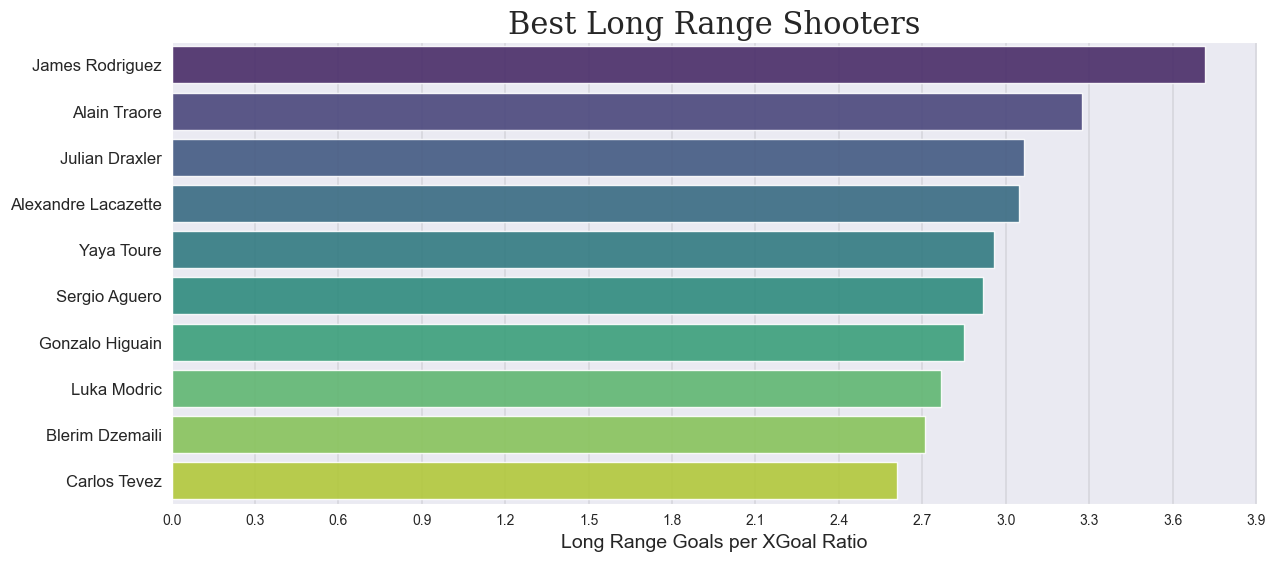

In [209]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[14,6])
ax = sns.barplot(x=show['ratio'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,4,0.3))
ax.set_xlabel(xlabel='Long Range Goals per XGoal Ratio', fontsize=14)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Best Long Range Shooters", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

## Which players make the best/most dangerous passes?

In [210]:
passing = shots[shots.assist_method.isin([1,4])]
passing_players = passing.groupby('player2').sum().reset_index()
passing_players.rename(columns={'player2': 'player', 'event_type': 'n_passes', 'is_goal': 'trueGoals_created', 'prediction': 'expectedGoals_created'}, inplace=True)
show = passing_players.sort_values('expectedGoals_created', ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show[['rank', 'player', 'n_passes', 'trueGoals_created', 'expectedGoals_created']].head(5)

rank              player  n_passes  trueGoals_created  \
0     1        Lionel Messi       350                 68   
1     2          Mesut Ozil       343                 35   
2     3       Cesc Fabregas       264                 53   
3     4  Zlatan Ibrahimovic       270                 36   
4     5        Marek Hamsik       370                 50   

   expectedGoals_created  
0              51.261896  
1              36.755885  
2              36.352534  
3              36.243778  
4              34.936518

In [211]:
show['xG_perpass'] = show['expectedGoals_created'] / show['n_passes']
show = show[show['n_passes']>80].sort_values('xG_perpass', ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'n_passes', 'xG_perpass']].head(10)
show.head(5)

rank          player  n_passes  xG_perpass
0     1     Luis Suarez       185    0.165056
1     2     Gareth Bale       109    0.156246
2     3  Angel Di Maria       211    0.150729
3     4     Raul Garcia        90    0.149170
4     5    Lionel Messi       350    0.146463

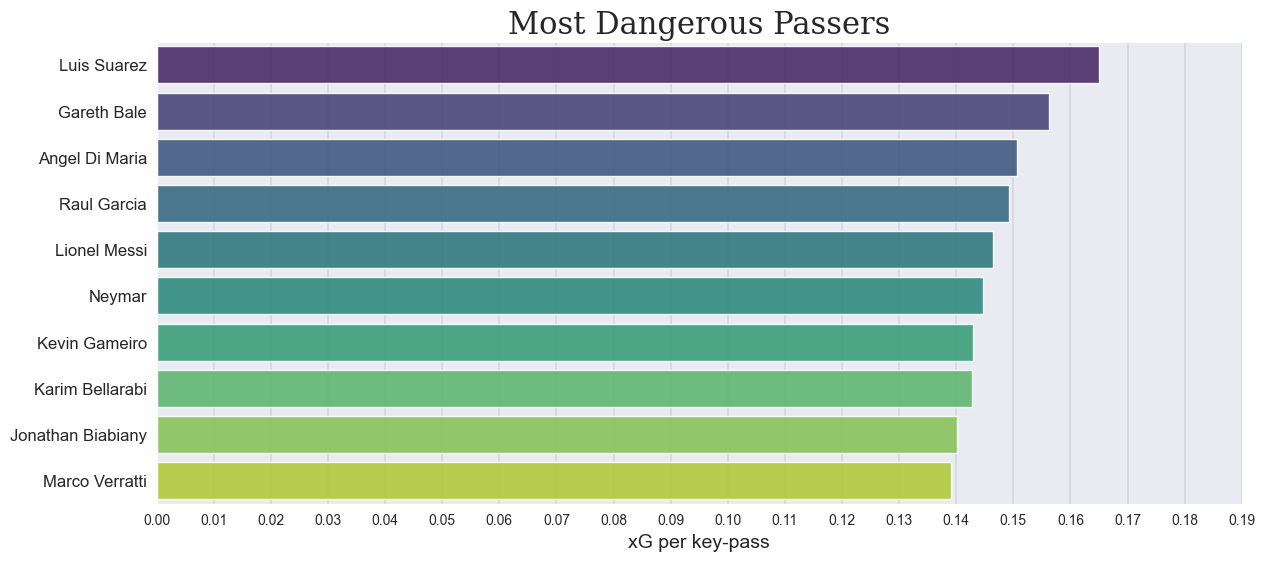

In [212]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[14,6])
ax = sns.barplot(x=show['xG_perpass'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,0.2,0.01))
ax.set_xlabel(xlabel='xG per key-pass', fontsize=14)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Most Dangerous Passers", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

## Which players are the most unlucky when passing the ball?

In [213]:
passing = shots[shots.assist_method.isin([1,4])]
passing_players = passing.groupby('player2').sum().reset_index()
passing_players.rename(columns={'player2': 'player', 'event_type': 'n_passes', 'is_goal': 'trueGoals_created', 'prediction': 'expectedGoals_created'}, inplace=True)
show = passing_players[passing_players['n_passes']>50].sort_values('difference', ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show[['rank', 'player', 'n_passes', 'trueGoals_created', 'expectedGoals_created', 'difference']].head(5)

rank             player  n_passes  trueGoals_created  \
0     1         Joan Verdu       134                  7   
1     2        Xabi Prieto       152                  6   
2     3  Philippe Coutinho       177                 13   
3     4    Alejandro Gomez       137                  5   
4     5      Luca Cigarini       164                  6   

   expectedGoals_created  difference  
0              14.549460    7.549460  
1              13.272356    7.272356  
2              19.902828    6.902828  
3              11.784143    6.784143  
4              12.775032    6.775032

In [214]:
show[['rank', 'player', 'n_passes', 'trueGoals_created', 'expectedGoals_created', 'difference']].tail(5)

rank             player  n_passes  trueGoals_created  \
686   687       Marek Hamsik       370                 50   
687   688  Cristiano Ronaldo       222                 45   
688   689      Karim Benzema       214                 40   
689   690      Cesc Fabregas       264                 53   
690   691       Lionel Messi       350                 68   

     expectedGoals_created  difference  
686              34.936518  -15.063482  
687              29.241883  -15.758117  
688              23.368451  -16.631549  
689              36.352534  -16.647466  
690              51.261896  -16.738104